In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/my-dataset/credit_train.csv
/kaggle/input/my-dataset/credit_test.csv


In [128]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [129]:
 # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit = pd.read_csv('../input/my-dataset/credit_train.csv')

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [130]:
credit.shape

(100514, 19)

In [131]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

In [132]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maximum Open Credit             99998 non-null float64
Bankruptcies                    99796 non-null float64
Tax 

In [133]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [134]:
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [135]:
credit.drop(credit.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [136]:
data_without_ms = credit.dropna()

In [137]:
data_without_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null object
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens       

In [138]:
## caregorical data to numerical

data_without_ms['Loan Status'] = data_without_ms['Loan Status'].map({'Fully Paid':int('0'),'Charged Off':int('1')})
data_without_ms['Term'] = data_without_ms['Term'].map({'Short Term':int('0'),'Long Term':int('1')})
data_without_ms['Years in current job'] = data_without_ms['Years in current job'].map({'< 1 year':int('0'),'1 year':int('1'),'2 years':int('2'),'3 years':int('3'),'4 years':int('4'),'5 years':int('5'),'6 years':int('6'),'7 years':int('7'),'8 years':int('8'),'9 years':int('9'),'10+ years':int('10')})


In [139]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = data_without_ms[[ 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

data_without_ms.drop(labels=['Home Ownership', 'Purpose'], axis=1, inplace=True)
data_without_ms = pd.concat([data_without_ms, categorical_subset], axis = 1)

In [140]:
data_without_ms.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0,99999999.0,0,741.0,2231892.0,8,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,217646.0,0,730.0,1184194.0,0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,548746.0,0,678.0,2559110.0,2,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,99999999.0,0,728.0,714628.0,3,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,0,99999999.0,0,740.0,776188.0,0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**start SMOTE**

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import math

def generate_model_report(y_actual, y_predicted):
    
    conf_mat = confusion_matrix(y_actual, y_predicted) 
    true_positive = conf_mat[1,1]
    true_negative = conf_mat[0,0]
    false_positive = conf_mat[0,1]
    false_negative = conf_mat[1,0]
    specificity = (true_negative)/(true_negative + false_positive)
    gm = math.sqrt(specificity * recall_score(y_actual, y_predicted))
    
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall/Sensitivity = " ,recall_score(y_actual, y_predicted))
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    print("ROC-AUC Score = " ,roc_auc_score(y_actual, y_predicted))
    print("G-Measure = " ,gm)
    
    sns.heatmap(conf_mat,cmap="coolwarm_r", annot=True,linewidths=0.5,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.show()
    pass

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass


In [142]:
X = data_without_ms.loc[:, data_without_ms.columns!='Loan Status']

Y = data_without_ms.loc[:, data_without_ms.columns=='Loan Status']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [143]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
Y_train = labelencoder_y_train.fit_transform(Y_train)
labelencoder_y_test = LabelEncoder()
Y_test = labelencoder_y_test.fit_transform(Y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count



{0: 23196, 1: 23196}

logistic regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.7092656142759094
Precision =  0.372112557748845
Recall/Sensitivity =  0.587143803843605
Specificity =  0.7411703601108033
F1 Score =  0.45552699228791765
ROC-AUC Score =  0.6641570819772041
G-Measure =  0.6596768788820717


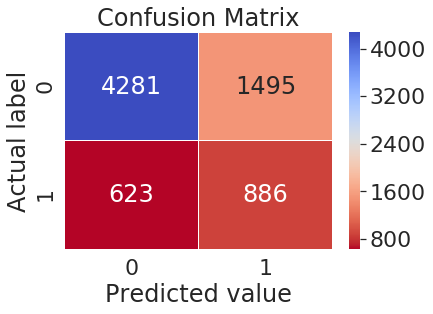

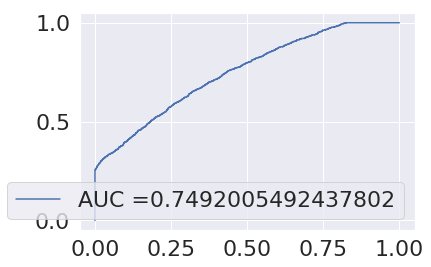

In [161]:
print("logistic regression")
clf = LogisticRegression().fit(x_train_res, y_train_res)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

KNN
Accuracy =  0.6726149622512011
Precision =  0.3329519450800915
Recall/Sensitivity =  0.5785288270377733
Specificity =  0.6971952908587258
F1 Score =  0.42265795206971674
ROC-AUC Score =  0.6378620589482495
G-Measure =  0.6350965074984729


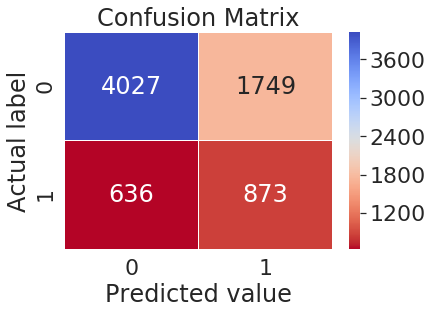

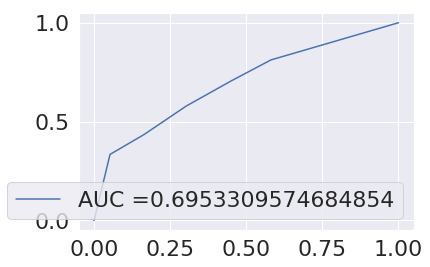

In [162]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN")

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(x_train_res, y_train_res)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Decision Tree
Accuracy =  0.7747426218256692
Precision =  0.45796178343949046
Recall/Sensitivity =  0.47647448641484424
Specificity =  0.8526662049861495
F1 Score =  0.4670347515427086
ROC-AUC Score =  0.6645703457004969
G-Measure =  0.6373960245436662


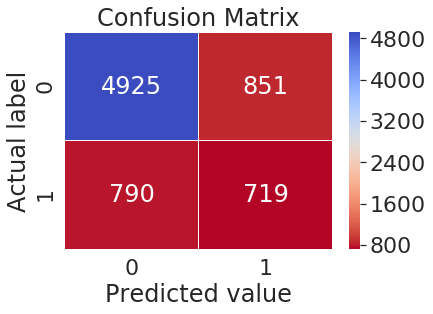

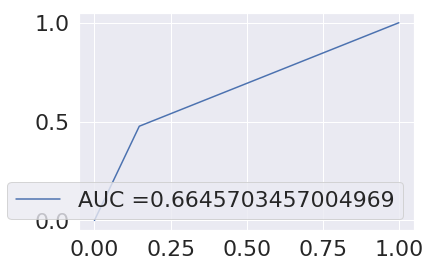

In [164]:
from sklearn import tree
print("Decision Tree")

clf = tree.DecisionTreeClassifier(random_state=1).fit(x_train_res, y_train_res)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Naive bayes
Accuracy =  0.3626630061770762
Precision =  0.24286183130948474
Recall/Sensitivity =  0.9807819748177601
Specificity =  0.20117728531855955
F1 Score =  0.3893200052610812
ROC-AUC Score =  0.5909796300681598
G-Measure =  0.44419709047135014


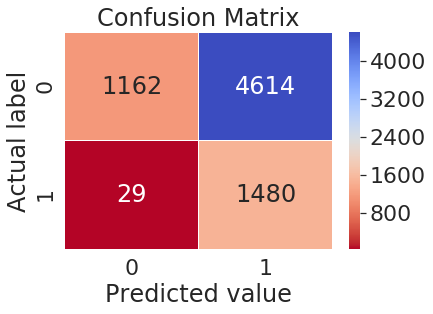

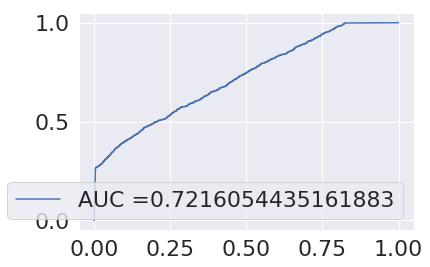

In [163]:
print("Naive bayes")
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(x_train_res, y_train_res)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Random forest
Accuracy =  0.8222374742621825
Precision =  0.6044921875
Recall/Sensitivity =  0.41020543406229293
Specificity =  0.9298822714681441
F1 Score =  0.488748519542045
ROC-AUC Score =  0.6700438527652185
G-Measure =  0.6176105251648655


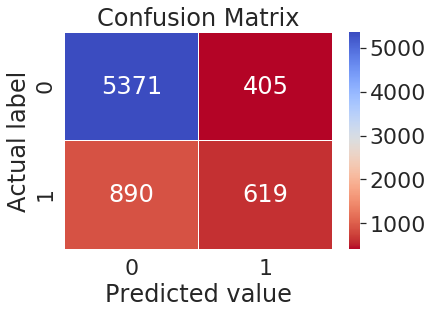

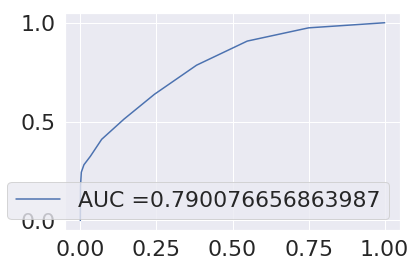

In [165]:
print("Random forest")
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy').fit(x_train_res, y_train_res)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

XGBoost
Accuracy =  0.7987645847632121
Precision =  0.5180217937971501
Recall/Sensitivity =  0.4095427435387674
Specificity =  0.9004501385041551
F1 Score =  0.45743893412287195
ROC-AUC Score =  0.6549964410214614
G-Measure =  0.6072666795921334


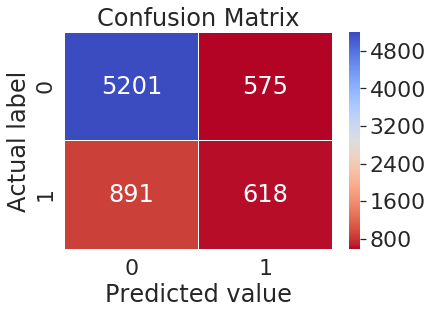

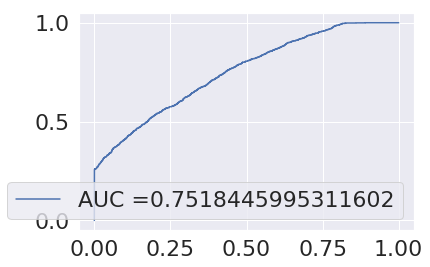

In [166]:
print("XGBoost")
from xgboost import XGBClassifier

clf = XGBClassifier().fit(x_train_res, y_train_res)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

In [151]:
data_without_ms.shape

(36423, 35)

k-fold

In [152]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
      
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, verbose = 2)
    return accuracies.mean()


def confusion_metrix(X_train, y_train, model):
    
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import f1_score, roc_auc_score, roc_curve
    import math
    
    ## confusion metrix 
    from sklearn.metrics import confusion_matrix
    y_pred = cross_val_predict(model, X_train, y_train, cv=3)
    conf_mat = confusion_matrix(y_train, y_pred) 
    true_positive = conf_mat[1,1]
    true_negative = conf_mat[0,0]
    false_positive = conf_mat[0,1]
    false_negative = conf_mat[1,0]
    specificity = (true_negative)/(true_negative + false_positive)
    gm = math.sqrt(specificity * recall_score(y_train, y_pred))
    
   

    print("Accuracy = " , accuracy_score(y_train, y_pred))
    print("Precision = " ,precision_score(y_train, y_pred))
    print("Recall/ Sensitivity = " ,recall_score(y_train, y_pred))
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_train, y_pred))
    print("ROC-AUC Score = " ,roc_auc_score(y_train, y_pred))
    print("G-Measure = " ,gm)
    return conf_mat


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    #model.fit(X_train, y_train)
    
    # Make predictions and evalute
    #model_pred = model.predict(X_test)
    model_acc_cross = cross_val(x_train_res, y_train_res, model)
    print ("print accuracy is ",model_acc_cross)
    
    con_matrix = confusion_metrix(x_train_res, y_train_res, model)
    print ("print confusion metrix is ",con_matrix)
    sns.heatmap(con_matrix,cmap="coolwarm_r", annot=True,linewidths=0.5,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.show()

    
    # Return the performance metric
    return model_acc_cross

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.4s finished


Accuracy =  0.8060441455423348
Precision =  0.8217458303118201
Recall/ Sensitivity =  0.781643386790826
Specificity =  0.8304449042938438
F1 Score =  0.8011931064958021
ROC-AUC Score =  0.8060441455423348
G-Measure =  0.8056747281225988
print confusion metrix is  [[19263  3933]
 [ 5065 18131]]


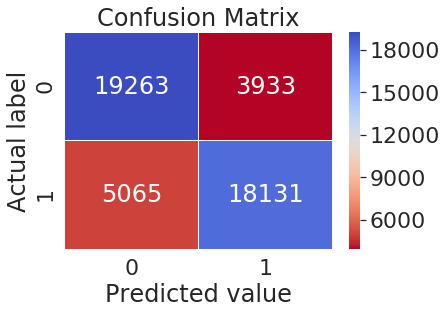

Decision tree Performance on the test set: Cross Validation Score = 0.8344


In [153]:
# # Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1) 
dt_cross = fit_and_evaluate(dt)

print('Decision tree Performance on the test set: Cross Validation Score = %0.4f' % dt_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  18.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


[CV] ................................................. , total=  19.9s
[CV]  ................................................................
[CV] ................................................. , total=  17.6s
[CV]  ................................................................
[CV] ................................................. , total=  18.9s
[CV]  ................................................................
[CV] ................................................. , total=  20.9s
[CV]  ................................................................
[CV] ................................................. , total=  17.4s
[CV]  ................................................................
[CV] ................................................. , total=  22.9s
[CV]  ................................................................
[CV] ................................................. , total=  21.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.3min finished


Accuracy =  0.8058285911364028
Precision =  0.7458243814540162
Recall/ Sensitivity =  0.9278754957751336
Specificity =  0.683781686497672
F1 Score =  0.8269489376416798
ROC-AUC Score =  0.8058285911364028
G-Measure =  0.7965326555521652
print confusion metrix is  [[15861  7335]
 [ 1673 21523]]


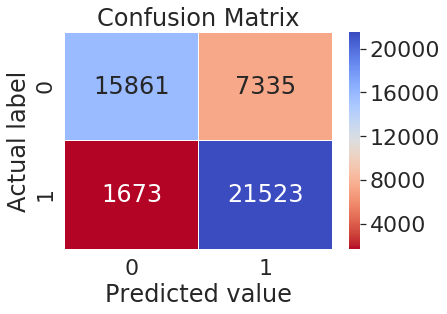

KNN Performance on the test set: Cross Validation Score = 0.8263


In [154]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  20.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV] ................................................. , total=  20.7s
[CV]  ................................................................
[CV] ................................................. , total=  18.0s
[CV]  ................................................................
[CV] ................................................. , total=  19.6s
[CV]  ................................................................
[CV] ................................................. , total=  20.6s
[CV]  ................................................................
[CV] ................................................. , total=  16.7s
[CV]  ................................................................
[CV] ................................................. , total=  18.8s
[CV]  ................................................................
[CV] ................................................. , total=  17.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.2min finished


Accuracy =  0.8341739955164683
Precision =  0.8029941758198804
Recall/ Sensitivity =  0.8856268322124504
Specificity =  0.7827211588204863
F1 Score =  0.8422886898050391
ROC-AUC Score =  0.8341739955164683
G-Measure =  0.832585647481294
print confusion metrix is  [[18156  5040]
 [ 2653 20543]]


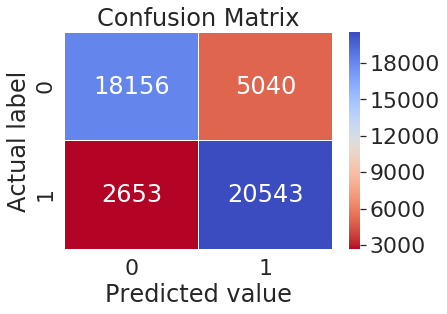

KNN Performance on the test set: Cross Validation Score = 0.8575


In [155]:
# # K-NN
# used eclbian distance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   1.1s
print accuracy is  0.6807419871079984


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.9s finished
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.6797723745473357
Precision =  0.7038521705123191
Recall/ Sensitivity =  0.620710467321952
Specificity =  0.7388342817727195
F1 Score =  0.6596719508842666
ROC-AUC Score =  0.6797723745473356
G-Measure =  0.6772017220242602
print confusion metrix is  [[17138  6058]
 [ 8798 14398]]


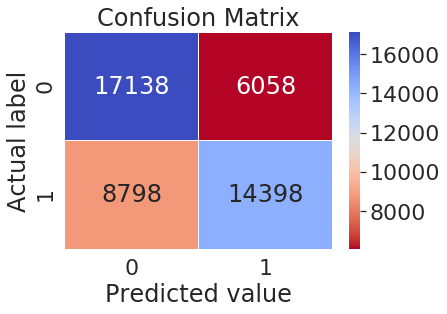

Logistic Regression Performance on the test set: Cross Validation Score = 0.6807


In [156]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ................................................. , total=   1.8s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.8s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.8s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.7s finished


Accuracy =  0.8482281427832384
Precision =  0.8846611743416353
Recall/ Sensitivity =  0.8008708397999655
Specificity =  0.8955854457665114
F1 Score =  0.8406833352189161
ROC-AUC Score =  0.8482281427832385
G-Measure =  0.8469051116055756
print confusion metrix is  [[20774  2422]
 [ 4619 18577]]


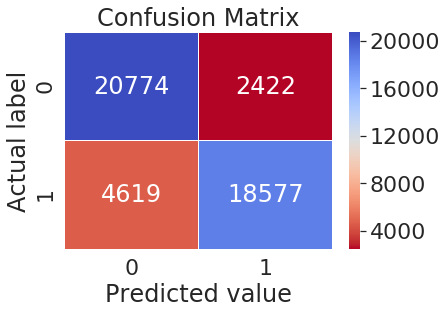

Random Forest Performance on the test set: Cross Validation Score = 0.8757


In [157]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   5.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] ................................................. , total=   6.0s
[CV]  ................................................................
[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.1s finished


Accuracy =  0.8047508191067425
Precision =  0.8644565889874201
Recall/ Sensitivity =  0.7228401448525608
Specificity =  0.8866614933609243
F1 Score =  0.787330954169797
ROC-AUC Score =  0.8047508191067425
G-Measure =  0.8005713723936164
print confusion metrix is  [[20567  2629]
 [ 6429 16767]]


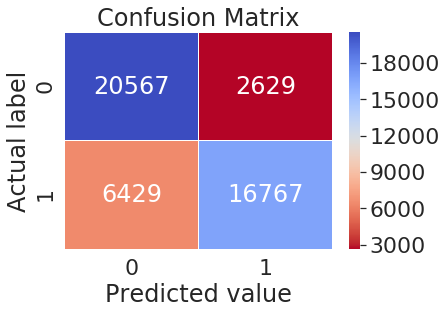

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8182


In [158]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
print accuracy is  0.5910715825786977


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


Accuracy =  0.5913950681151923
Precision =  0.5509443937136541
Recall/ Sensitivity =  0.9884031729608553
Specificity =  0.19438696326952923
F1 Score =  0.7075142724888136
ROC-AUC Score =  0.5913950681151923
G-Measure =  0.4383294323654618
print confusion metrix is  [[ 4509 18687]
 [  269 22927]]


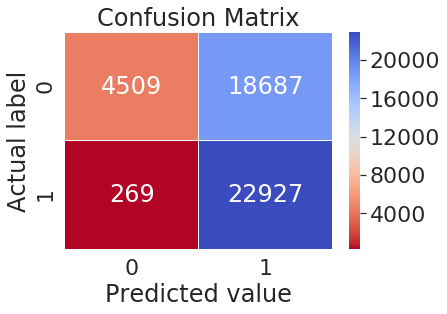

Naive Bayes Performance on the test set: Cross Validation Score = 0.5911


In [159]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)